# Project1 : 캘리포니아 주택 가격 분석

## 1. 데이터셋

# 데이터 확인 및 전처리

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df=data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


변수	        설명
+ MedInc        지역 중위 소득 (10,000 USD)
+ HouseAge	    주택 연식 (건축 후 경과된 연도 수)
+ AveRooms	    가구당 평균 방 개수
+ AveBedrms	    가구당 평균 침실 개수
+ Population	지역 내 인구 수
+ AveOccup	    가구당 평균 거주 인원 수     
+ Latitude	    위도                         
+ Longitude	    경도                         \_
+ MedHouseVal	주택 중위 가격 (100,000 USD)  <- 종속 변수

In [4]:
#데이터 전처리:결측값 확인
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 3.학습/평가 데이터 분할
+ 학습 데이터와 평가 데이터를 7:3 비율로 분할

In [6]:
X=data.data   # feature
y=data.target # target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## 4.데이터 탐색

In [7]:
# 요약 통계량
df_train=pd.concat([X_train, y_train], axis=1)
df_train.describe()
#평균 중위 주택 가격은 20만 달러
#중위 주택 가격의 중간값은 17만9천달러
#최솟값은 1만4천달러
#1사분위수는 11만9천달러
#3사분위수는 26만달러
#최댓값은 50만달러

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.876892,28.575374,5.438125,1.098033,1427.927326,3.119236,35.650669,-119.584102,2.069240
std,1.904908,12.613634,2.453569,0.447498,1140.225190,12.373636,2.135742,2.002930,1.157492
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.567225,18.000000,4.448928,1.006783,791.000000,2.430380,33.940000,-121.800000,1.193000
50%,3.539100,29.000000,5.232422,1.049492,1168.000000,2.817147,34.270000,-118.510000,1.793000
75%,4.758075,37.000000,6.060692,1.100328,1727.000000,3.279135,37.720000,-118.010000,2.646000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.info()

In [15]:
#데이터 전처리:결측값 확인
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

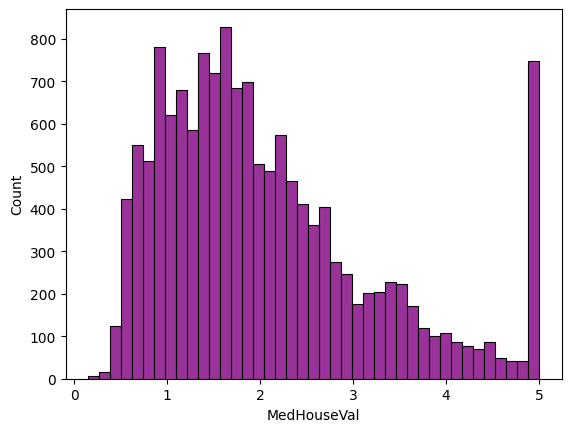

In [8]:
#중위 주택 가격의 분포
sns.histplot(df_train['MedHouseVal'], color='purple', alpha=0.8)
plt.show()

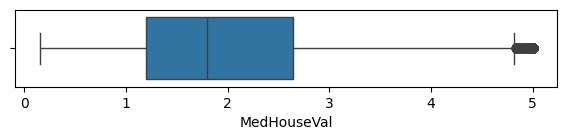

In [9]:
plt.figure(figsize=(7,1))
sns.boxplot(x=df_train['MedHouseVal'], vert=False)                   # 아주 많다
plt.show()                                                           #    |
#초과 이상값이 아주 많이 존재 한다                                         v  

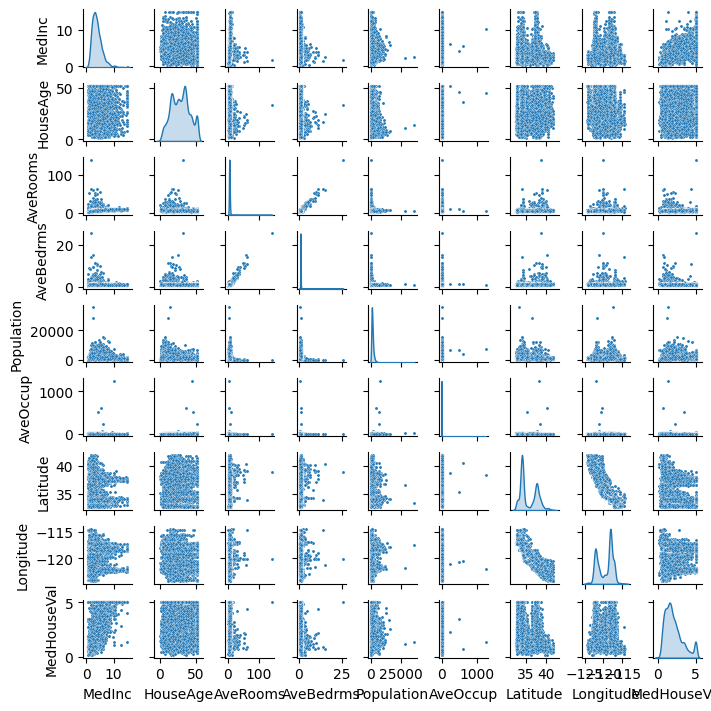

In [10]:
sns.pairplot(df_train,height=0.8, plot_kws={'s':5}, diag_kind='kde')
plt.show()

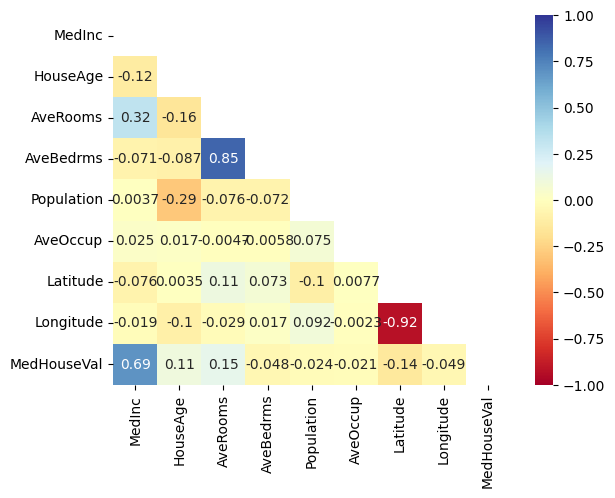

In [11]:
corr_df=df_train.corr()
df_up=np.triu(corr_df)
sns.heatmap(corr_df,mask=df_up, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.show()


+ 히트맵으로 보아 지역 중위 소득은 중위 주택 가격과 강한 양의 상관관계를 가지고, 방의 개수, 주택의 연식과 약한 양의 상관관계를 가짐.

+ 나머지는 중위 주택 가격과 상관관계를 가지지 않음.

+ 따라서 중위 주택 가격을 예측하는 특성(feature)으로 해당 변수를 선택함.


+ 추가로, 중위 소득이 높으면 더많은 방을 가짐.

## 5.회귀모델 학습 및 평가


In [12]:
#상관관계가 존재하는 특성(object) 선택
features=['MedInc','HouseAge','AveRooms','Latitude']

X_train=df_train[features]  #2차원 배열

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train);

#회기계수(regression coefficient)
pd.DataFrame({'Feature':features, 'Coefficient':model.coef_})

,Feature,Coefficient
0,MedInc,0.435658
1,HouseAge,0.016937
2,AveRooms,-0.019505
3,Latitude,-0.045071


+ 특성(feature)가 중위 주택 가격(target)에 미치는 영향은 다음과 같음
  +지역 중위 소득이 1만 달러  

In [14]:
#평가 데이터에서도 학습 데이터에서 사용한 독립변수만 선택
X_test=X_test[features]

#학습 데이터를 학습한  회귀모델에 평가데이터를 입력하여 예측값 계산
y_pred =model.predict(X_test)

# 평가 데이터의 실제 관측값과 예측값과 비교하여 모델을 평가: RMSE, 결정계수
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test,y_pred)

print(f'RMSE:{RMSE:.3f}')
print(f'결정계수:{R2:.3f}')

RMSE:0.794
결정계수:0.520


+ RMSE는 0.794으로, 주택 중위 가격의 실제값과 예측값이 평균적으로 약 8만 달러 차이가 있다는 것을 의미함
+ 학습 데이터에서 주택 중위 가격의 평균은 약 20만 달러인 점을 고려하면, 모델의 평균 오차는 약 25% 수준임을 알 수 있음
+ 따라서 평균 오차가 비교적 큰 편이므로, 모델 성능 개선이 필요한 것으로 판단됨
+ 결정계수는 52%로 나타남
